In [1]:

import webbrowser

webbrowser.open('https://dr7.lamost.org/v2.0/search')

webbrowser.open('https://dr7.lamost.org/v2.0/medcas/search')

webbrowser.open('https://dr7.lamost.org/spectrum/')

webbrowser.open('https://dr7.lamost.org/catalogue')



True

In [ ]:
webbrowser.open('https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=V/156')

webbrowser.open('https://annayqho.github.io/TheCannon/lamost_tutorial.html')

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt

from astroquery.gaia import Gaia
from astroquery.simbad import Simbad

import astropy.coordinates as coord
import astropy.units as u

import pyvo as vo

import webbrowser

import starcolorindexSpT 

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
import astroquery

print("pandas" + str(pd.__version__))
print("numpy"  + str(np.__version__))
print("scipy"  + str(sp.__version__))

print("matplotlib" + str(matplotlib.__version__))

print("astroquery" + str(astroquery.__version__))


print("\n")
!python --version

print("\n")
!jupyter --version

pandas1.1.5
numpy1.24.2
scipy1.9.3
matplotlib3.2.2
astroquery0.4.7.dev8479


Python 3.8.5


Selected Jupyter core packages...
IPython          : 8.12.0
ipykernel        : 6.19.2
ipywidgets       : 8.0.4
jupyter_client   : 8.1.0
jupyter_core     : 5.3.0
jupyter_server   : 2.5.0
jupyterlab       : not installed
nbclient         : 0.5.13
nbconvert        : 7.3.1
nbformat         : 5.7.0
notebook         : 6.5.3
qtconsole        : 5.4.2
traitlets        : 5.7.1


In [1]:
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [3]:
make_canvas_flag = "Y"

hydrogen_lines_flag = "N"

In [4]:
def make_labels(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

In [5]:
def make_RVS_canvas(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    yMin = float(xp['flux'].min())
    #yRangeMin = yMin + 0.2
    yRangeMin = 1.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('Ca II 8498', xy=[8498, yRangeMin ],  rotation=-90, color='red')
    plt.annotate('Ca II 8542', xy=[8542, yRangeMin ], rotation=-90, color='red')
    plt.annotate('Pa14 8600', xy=[8600, yRangeMin - 0.3 ], rotation=-90, color='red')
    plt.annotate('Ca II 8662.1', xy=[8662, yRangeMin ],  rotation=-90, color='red')

In [6]:
# Plotter ==============================================
def make_canvas(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    plt.xticks([3839, 3889, 3970, 4101, 4340, 4472, 4861, 5175, 5270, 5411, 5755, 5895, 6302,
               6365, 6562, 6562, 6890, 7135, 7500, 7775, 8000, 8498, 8542, 8662, 9000, 9200])
    
    xLabels = (3839, 3889, 3970, 4101, 4340, 4472, 4861, 5175, 5270, 5411, 5755, 5895, 6302,
               6365, 6562, 6562, 6890, 7135, 7500, 7775, 8000, 8498, 8542, 8662, 9000, 9200)

    plt.xticks(xLabels, rotation=90)

    yMin = float(xp['flux'].min())
    #yRangeMin = yMin + 0.2
    yRangeMin = 0.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('CN 3839', xy=[3839,   yRangeMin + 0.6],  rotation=-90)
    plt.annotate('H-zeta 3889', xy=[3889, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-epsilon 3970', xy=[3970, yRangeMin +  0.6],  rotation=-90, color='red')
    plt.annotate('H-delta 4101', xy=[4101, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-gamma 4340', xy=[4340, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('He I 4471.7', xy=[4472, yRangeMin + .20],  rotation=-90, color='orange')
    plt.annotate('H-beta 4861', xy=[4861, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('Mg I 5175', xy=[5175, yRangeMin + .20],  rotation=-90)
    plt.annotate('Fe I 5270', xy=[5270, yRangeMin +  .20],  rotation=-90)
    plt.annotate('He II 5411', xy=[5411, yRangeMin +  .20],  rotation=-90, color='orange')
    plt.annotate('N II 5755', xy=[5755, yRangeMin +  .20],  rotation=-90)
    plt.annotate('D1 Na I 5895', xy=[5895, yRangeMin +  .20],  rotation=-90, color='blue')
    plt.annotate('OI 6302', xy=[6302, yRangeMin +  .20],  rotation=-90, color='green')
    plt.annotate('OI 6365.5', xy=[6365, yRangeMin +  .20],  rotation=-90, color='green')
    plt.annotate('H-alpha 6562', xy=[6562, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('CN 6890', xy=[6890, yRangeMin +  .20],  rotation=-90)
    plt.annotate('Ar III 7135', xy=[7135, yRangeMin +  .20],  rotation=-90)
    plt.annotate('O I 7775', xy=[7775, yRangeMin +  .20], rotation=-90, color='green')
    plt.annotate('Ca II 8498', xy=[8498, yRangeMin +  .35],  rotation=-90, color='blue')
    plt.annotate('Ca II 8542', xy=[8542, yRangeMin +  .30], rotation=-90, color='blue')
    plt.annotate('Ca II 8662.1', xy=[8662, yRangeMin +  .30],  rotation=-90, color='blue')





def Hydrogen_lines(xlabel = '', ylabel = '', fontsize = 12):
    #plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    plt.xticks([3835, 3889, 3970, 4101, 4340, 4861, 6000, 6562, 7000, 8000, 9000, 10000])
    
    xLabels = (3835, 3889, 3970, 4101, 4340, 4861, 6000, 6562, 7000, 8000, 9000, 10000)

    plt.xticks(xLabels, rotation=90)

    yMin = float(xp['flux'].min())
    #yRangeMin = yMin + 0.2
    yRangeMin = 0.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('H12 3750', xy=[3750, yRangeMin +  .50],  rotation=-90, color='red')
    plt.annotate('H11 3771', xy=[3771, yRangeMin -  .35],  rotation=-90, color='red')
    plt.annotate('H10 3798', xy=[3798, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H9 3835', xy=[3835, yRangeMin -  .10],  rotation=-90, color='red')

    plt.annotate('H8-zeta 3889', xy=[3889, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-epsilon 3970', xy=[3970, yRangeMin +  0.6],  rotation=-90, color='red')
    plt.annotate('H-delta 4101', xy=[4101, yRangeMin +  .20],  rotation=-90, color='red')
    plt.annotate('H-gamma 4340', xy=[4340, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('H-beta 4861', xy=[4861, yRangeMin + .20],  rotation=-90, color='red')
    plt.annotate('H-alpha 6562', xy=[6562, yRangeMin +  .20],  rotation=-90, color='red')

In [7]:
def make_RVS_canvas1(xlabel = '', ylabel = '', fontsize = 12):     ### 8460 - 8580
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    yMin = float(xp['flux'].min())
    yRangeMin = 1.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('Fe I 8470', xy=[8470, yRangeMin ],  rotation=-90, color='green')
    plt.annotate('Mg I 8476', xy=[8476, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Fe I 8483', xy=[8483, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Ca II 8498', xy=[8498, yRangeMin ],  rotation=-90, color='red')
    plt.annotate('Ca II 8502', xy=[8502, yRangeMin],  rotation=-90, color='red')
    plt.annotate('Ce II 8514', xy=[8514, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Fe I 8516', xy=[8516, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Ti I 8520.6', xy=[8520.6, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Zr II 8527', xy=[8527, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Fe I 8529', xy=[8529, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Si I 8538', xy=[8538, yRangeMin - 0.3],  rotation=-90, color='red')
    plt.annotate('Ca II 8542', xy=[8542, yRangeMin],  rotation=-90, color='red')
    plt.annotate('Ca II 8546', xy=[8546, yRangeMin - 0.3],  rotation=-90, color='red')
    plt.annotate('Cr I 8551', xy=[8551, yRangeMin  - 0.3],  rotation=-90, color='green')
    plt.annotate('Si I 8559', xy=[8559, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Ti I 8572', xy=[8572, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Fe I 8574', xy=[8574, yRangeMin - 0.3],  rotation=-90, color='green')

In [8]:
def make_RVS_canvas2(xlabel = '', ylabel = '', fontsize = 12):    ### 8580 - 8700
    plt.xlabel("Wavelength [Angstroms]",  fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.grid()

    yMin = float(xp['flux'].min())
    yRangeMin = 1.8 

    yRangeMax = float(xp['flux'].max())
    yRange = yRangeMax

    plt.annotate('Fe I 8584', xy=[8584, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Fe II 8588', xy=[8588, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Nd II 8594', xy=[8594, yRangeMin - 0.3],  rotation=-90, color='blue')
    plt.annotate('Fe I 8624', xy=[8624, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('N I 8631',  xy=[8631, yRangeMin  - 0.3 ],  rotation=-90, color='red')
    plt.annotate('Ca I 8636',  xy=[8636, yRangeMin  - 0.3 ],  rotation=-90, color='red')
    plt.annotate('Ni I 8639',  xy=[8639, yRangeMin  - 0.3 ],  rotation=-90, color='red')
    plt.annotate('Cr I 8645', xy=[8645, yRangeMin  - 0.3],  rotation=-90, color='green')
    plt.annotate('Ca II 8662', xy=[8662, yRangeMin],  rotation=-90, color='red')
    plt.annotate('Ca II 8666', xy=[8666, yRangeMin],  rotation=-90, color='red')
    plt.annotate('S I 8672',  xy=[8672, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Fe I 8677', xy=[8677, yRangeMin],  rotation=-90, color='green')
    plt.annotate('N I 8685',  xy=[8685, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Si I 8688', xy=[8688, yRangeMin  - 0.3],  rotation=-90, color='red')
    plt.annotate('Fe I 8691', xy=[8691, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('Ti I 8694', xy=[8694, yRangeMin - 0.3],  rotation=-90, color='green')
    plt.annotate('S I 8697',  xy=[8697, yRangeMin  - 0.3 ],  rotation=-90, color='red')

In [9]:
def PlotTarget4B(target, i, targetstring, freqmin, freqmax):
    import matplotlib.pyplot as plt

    import astropy.units as u
    

    plt.rcParams.update({'figure.max_open_warning': 0})
    


    lc0 = lk.search_lightcurve(target)[i].download();

    lc = lc0.remove_nans().normalize().remove_outliers()


    
    #lc = lc0.flatten()
    #lc = lc0.remove_outliers()
    #lc = lc0.remove_outliers(sigma=3)





    if plot_lightcurve  == "Y":
        #plt.figure(figsize=(13, 10))
        lc.plot()
        #lc.plot(label='Lightcurve Plot2')
        sText = "\nLightcurve Plot"
        plt.title(str(target) + " (" + str(i) + ")"  + sText);
       
    
    #period = np.linspace(1, 20, 10000)
    period = np.linspace(freqmin, freqmax, 10000)
    bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
    #bls = lc.normalize().to_periodogram(method='bls', period=period, frequency_factor=500);
    
    period_array = bls.period
    period_rounded = np.round(period_array, 1)
    power_array = bls.power

    # Save the highest peak as the planet candidate
    #index = np.argmax(power_array.power)
    #bls_period = period_array.period[index]


    df_dict = {
        'Period': period_rounded,
        'Power': power_array
        }
    df = pd.DataFrame(df_dict)
    df = df.sort_values(by=['Power'], ascending=False)
    df = df.drop_duplicates(subset=['Period'], keep='first')
    #print(df[0:10])


    planet_period = bls.period_at_max_power
    planet_t0 = bls.transit_time_at_max_power
    planet_dur = bls.duration_at_max_power

    if plot_period      == "Y":
        #plt.figure(figsize=(13, 10))
        #print("Period Array: " + str(period_array))
        bls.plot()
        #plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + "\n                    LightKurve Period:  " + str(planet_period));
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + "\n                    LightKurve Period:   + {0:.4f} ".format(planet_period) + "\nlc0.remove_nans().normalize().remove_outliers()");
        #plt.axvline(bls_period, color="C1", lw=5, alpha=0.8)
        # + "\nPeriod array: " + str(period_array)  + "\nPower array: " + str(power_array)
        #print(df['Period'][0:10])


    if plot_phase_fold  == "Y":
        #plt.figure(figsize=(13, 10))
        ax = lc.fold(period=planet_period, epoch_time=planet_t0).scatter()
        ax.set_xlim(-5, 5)
        sText = "\nPhase-fold the light curve to confirm period and transit time (epoch) \ncorrespond to a transit signal."
        plt.title(str(target) + " (" + str(i) + ")"  + sText);
        plt.show();

    if plot_4phase_fold == "Y":
        #plt.figure(figsize=(13, 10))
        pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
        pg.period_at_max_power
        lc.fold(period=4*pg.period_at_max_power, wrap_phase=0.2).scatter();
        sText1 = "\nThe above eclipses may not line up or look like the correct period of an eclipsing binary."  
        sText2 = "\nThis is common for eclipsing binaries with deep secondary eclipses, we may have found a harmonic of the period." 
        sText3 = "\nLet's plot it again with quadruple the period."
        plt.title(str(target) + " (" + str(i) + ")"  + sText1 + sText2 + sText3)
        plt.show();

    
    if plot_periodogram == "Y":
        pg = lc.to_periodogram(oversample_factor=1)
        pg.plot()
        sText = "\nPlot the periodogram in the same way that we plot the original light curve."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring)   + sText)
        plt.show()

        pg.plot(view='period', scale='log')
        sText = "\nLet's plot it in period space, so that we can see what period the oscillation is occurring at."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        lc.fold(period=pg.period_at_max_power).scatter()
        sText = "\nLet's use the period_at_max_power to fold the light curve"
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        lc.fold(period=4*pg.period_at_max_power, wrap_phase=0.2).scatter()
        sText = "\nIf the eclipses do not line up, try plotting it again with quadruple the period."
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring) + sText)
        plt.show()

        pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
        pg.period_at_max_power  
        sText ="\nLet's try to get a more precise period by increasing the number of points in our periodogram \nusing the `oversample_factor` parameter and by constraining the range of the period value:"
        #sText ="\nLet's try to get a more precise period by increasing the number of points in our periodogram \nusing the `oversample_factor` parameter."
        lc.fold(period=pg.period_at_max_power, wrap_phase=0.2).scatter()
        #lc.fold(period=pg.period_at_max_power).scatter()
        plt.title(str(target) + " (" + str(i) + ")" + str(targetstring)  + sText)
        plt.show()

    plt.figure(figsize=(13.5, 1))
    plt.axhline(y=0.5, color='r', linestyle='-')
    plt.axis('off')
    plt.close()

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
#df_lamost_stars = pd.read_csv('LAMOST LRS General Catalog.csv', delimiter='|')    # 10431197 stars

df_lamost_LRS_stars = pd.read_csv('dr7_v2.0_LRS_catalogue.csv', delimiter='|')     # 10431197 stars

df_lamost_MRS_stars = pd.read_csv('dr7_v2.0_MRS_catalogue.csv', delimiter='|')     # 14096967 stars - No subclass field

#df_lamost_stars = pd.read_csv('dr7_v2.0_LRS_mstellar.csv', delimiter='|')         # 708797 stars

#df_lamost_stars = pd.read_csv('dr7_v2.0_LRS_cv.csv', delimiter='|')               # 424 stars

#df_lamost_stars = pd.read_csv('dr7_v2.0_LRS_wd.csv', delimiter='|')               # 14531 stars


#df_lamost_stars.shape[0]

In [12]:
df_lamost_LRS_stars['gaia_source_id'] = df_lamost_LRS_stars['gaia_source_id'].astype('Int64')

df_lamost_MRS_stars['gaia_source_id'] = df_lamost_MRS_stars['gaia_source_id'].astype('Int64')

In [13]:

df_O = pd.read_csv('df_O_60108_small.csv')
df_B = pd.read_csv('df_B_812641.csv')
df_A = pd.read_csv('df_A_1000000.csv')
df_F = pd.read_csv('df_F_1000000.csv')
df_G = pd.read_csv('df_G_1000000.csv')
df_K = pd.read_csv('df_K_1000000.csv')
df_M = pd.read_csv('df_M_1000000.csv')
df_CSTAR = pd.read_csv('df_CSTAR_83028_small.csv')
df_beStar = pd.read_csv('df_beStar_9138_small.csv')
df_HerbigStar = pd.read_csv('df_HerbigStar_1897_small.csv')
df_RedDwarfEmStar = pd.read_csv('df_RedDwarfEmStar_454_small.csv')
df_rrlyrae = pd.read_csv('df_rrlyrae_10532_small.csv')
df_TTauri = pd.read_csv('df_TTauri_28399_small.csv')
df_wN = pd.read_csv('df_wN_185_small.csv')
df_Very_Metal_Poor = pd.read_csv('df_Very_Metal_Poor_75849_small.csv')
df_Extremely_Metal_Poor = pd.read_csv('df_Extremely_Metal_Poor_28869_small.csv')
df_Ultra_Metal_Poor = pd.read_csv('df_Ultra_Metal_Poor_11187_small.csv')

In [14]:
df_mergedA = pd.concat([df_O, df_B, df_A, df_F, df_G, df_K, df_M, df_CSTAR,
                       df_beStar, df_HerbigStar, df_RedDwarfEmStar, df_rrlyrae, df_TTauri, df_wN,
                       df_Very_Metal_Poor, df_Extremely_Metal_Poor, df_Ultra_Metal_Poor], ignore_index=True, sort=False)

print("df_mergedA: " + str(df_mergedA.shape[0]))

df_mergedA: 6122287


In [15]:
df_mergedB = pd.read_csv('xp_sampled_source_id_769025.csv')

df_mergedB.shape[0]

769024

In [16]:
df_LRS1_stars = df_lamost_LRS_stars[df_lamost_LRS_stars['gaia_source_id'].astype(str).isin(df_mergedA['source_id'].astype(str))]
df_LRS1_stars.shape[0]


399400

In [17]:
df_LRS2_stars = df_lamost_LRS_stars[df_lamost_LRS_stars['gaia_source_id'].astype(str).isin(df_mergedB['source_id'].astype(str))]
df_LRS2_stars.shape[0]

335770

In [18]:
df_LRS_stars = pd.concat([df_LRS1_stars, df_LRS2_stars], ignore_index=True)
df_LRS_stars.shape[0]

735170

In [19]:
df_MRS_stars = df_LRS_stars[df_LRS_stars['gaia_source_id'].astype(str).isin(df_lamost_MRS_stars['gaia_source_id'].astype(str))]
df_MRS_stars.shape[0]

117560

In [20]:
df_stars = df_MRS_stars.drop_duplicates(keep='first')
df_stars.shape[0]

112223

In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

df_stars.head(5)

,obsid,designation,obsdate,lmjd,mjd,planid,spid,fiberid,ra_obs,dec_obs,snru,snrg,snrr,snri,snrz,objtype,class,subclass,z,z_err,magtype,mag1,mag2,mag3,mag4,mag5,mag6,mag7,tsource,fibertype,tfrom,tcomment,offsets,offsets_v,ra,dec,fibermask,gaia_source_id,gaia_g_mean_mag
11,601193,J221342.45+281125.2,2011-10-25,55860,55859,B6001,1,193,333.426899,28.190346,6.26,50.28,83.09,103.37,67.20,Star,STAR,G4,-0.000200,0.000025,ugrizjh,16.07,14.52,13.94,14.29,13.56,12.61,12.22,PILOT,Obj,-,.,0,0.0,333.426899,28.190346,0,1892612493291500544,13.947916
17,613049,J222151.61+305056.7,2011-10-25,55860,55859,B6001,13,49,335.465058,30.849089,0.11,6.88,16.52,51.35,47.60,Star,STAR,dM4,-0.000084,0.000006,ugrizjh,19.21,16.53,15.08,13.89,13.24,11.90,11.32,PILOT,Obj,-,.,0,0.0,335.465058,30.849089,0,1895595915016951808,14.581588
57,1201014,J224156.46+282839.7,2011-10-28,55863,55862,B6301,1,14,340.485252,28.477722,5.73,42.76,77.00,89.39,60.77,Star,STAR,G1,-0.000060,0.000019,ugrizjh,99.00,99.00,99.00,99.00,99.00,13.37,13.10,PILOT,Obj,-,.,0,0.0,340.485252,28.477722,0,1887236946584528640,14.358581
330,1401043,J035951.88+261441.0,2011-10-28,55863,55862,GAC_060N28_B1,1,43,59.966197,26.244731,3.70,29.07,41.67,42.28,23.55,star,STAR,A1,0.000093,0.000003,ugrizjh,99.00,14.36,14.47,14.52,99.00,99.00,99.00,PILOT,Obj,-,xuyi_r,0,0.0,59.966197,26.244731,0,67248025238245888,14.405618
335,1402002,J035708.53+264259.0,2011-10-28,55863,55862,GAC_060N28_B1,2,2,59.285562,26.716402,13.26,65.77,107.88,139.06,105.97,star,STAR,G3,0.000054,0.000012,ugrizjh,99.00,14.43,13.83,13.63,99.00,99.00,99.00,PILOT,Obj,-,xuyi_r,0,0.0,59.285562,26.716402,64,67473631280414848,13.894524


In [22]:
unique_subclass = np.unique(df_stars['subclass'].astype(str))

In [23]:
unique_subclass

array(['A0', 'A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'B', 'B6',
       'B9', 'CV', 'Carbon', 'CarbonWD', 'DoubleStar', 'EM', 'F0', 'F2',
       'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'G0', 'G1', 'G2', 'G3',
       'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'K0', 'K1', 'K2', 'K3', 'K4',
       'K5', 'K7', 'Non', 'O', 'WD', 'dM0', 'dM1', 'dM2', 'dM3', 'dM4',
       'dM5', 'dM6', 'dM7', 'gM0', 'gM1', 'gM2', 'gM3', 'gM4', 'gM5',
       'gM6', 'gM7', 'gM8', 'gM9', 'sdM0', 'sdM1', 'sdM2'], dtype=object)

In [24]:
for vartype in unique_subclass:
    v = df_stars[df_stars['subclass'] == vartype]
    print(str(vartype) + "  count: "  + str(v.shape[0]))

A0  count: 523
A1  count: 7928
A2  count: 5507
A3  count: 646
A5  count: 3188
A6  count: 1708
A7  count: 2977
A8  count: 92
A9  count: 219
B  count: 4
B6  count: 1345
B9  count: 569
CV  count: 13
Carbon  count: 91
CarbonWD  count: 2
DoubleStar  count: 47
EM  count: 5
F0  count: 7464
F2  count: 2696
F3  count: 703
F4  count: 601
F5  count: 6714
F6  count: 2459
F7  count: 3427
F8  count: 994
F9  count: 5545
G0  count: 2897
G1  count: 1218
G2  count: 6004
G3  count: 7311
G4  count: 1819
G5  count: 9995
G6  count: 1674
G7  count: 4817
G8  count: 3194
G9  count: 1274
K0  count: 791
K1  count: 2522
K2  count: 141
K3  count: 2099
K4  count: 900
K5  count: 1804
K7  count: 1322
Non  count: 2043
O  count: 3
WD  count: 156
dM0  count: 933
dM1  count: 863
dM2  count: 480
dM3  count: 99
dM4  count: 567
dM5  count: 119
dM6  count: 6
dM7  count: 1
gM0  count: 325
gM1  count: 341
gM2  count: 248
gM3  count: 208
gM4  count: 232
gM5  count: 118
gM6  count: 79
gM7  count: 77
gM8  count: 33
gM9  count: 34

In [25]:

vartype = 'Carbon'

df_variable = df_stars[df_stars['subclass'] == vartype]
df_variable.shape[0]

91

In [26]:
dfs = df_variable.reset_index(drop=True)

In [27]:
dfs[['obsid', 'designation', 'objtype', 'subclass', 'gaia_source_id']].head()

,obsid,designation,objtype,subclass,gaia_source_id
0,25507041,J041414.05+435448.2,Star,Carbon,232198030944852864
1,34209028,J035020.92+465736.2,star,Carbon,245319946314530304
2,39204176,J045320.72+435025.9,star,Carbon,205323866525246592
3,90703190,J073232.73+264715.4,star,Carbon,872296282883209344
4,105108135,J054501.52+304533.0,star,Carbon,3444601773264263680


In [28]:
dfs['source_id'] = dfs['gaia_source_id'].astype('Int64')

In [29]:
gaia_list = dfs['source_id'][0:10].to_list()   # Change range as needed but keep is reasonable else Gaia may cancel the connection

gaia_list

[232198030944852864,
 245319946314530304,
 205323866525246592,
 872296282883209344,
 3444601773264263680,
 470057477335168128,
 449198642242438912,
 450004957920960384,
 245946289985307904,
 168708759226404736]

In [30]:

source_id_target = '245319946314530304'
source_id_target

'245319946314530304'

In [31]:
des = df_lamost_LRS_stars[df_lamost_LRS_stars['gaia_source_id'].astype(str) == source_id_target]

lamost_LRS_designation = des['designation'].iloc[0]
lamost_LRS_subclass = des['subclass'].iloc[0]
lamost_LRS_obsid = des['obsid'].iloc[0]

print("lamost_LRS_designation: " + str(lamost_LRS_designation))
print("lamost_LRS_subclass: " + str(lamost_LRS_subclass))
print("lamost_LRS_obsid: " + str(lamost_LRS_obsid))

lamost_LRS_designation: J035020.92+465736.2
lamost_LRS_subclass: Carbon
lamost_LRS_obsid: 34209028


In [32]:
des = df_lamost_MRS_stars[df_lamost_MRS_stars['gaia_source_id'].astype(str) == source_id_target]

lamost_MRS_designation = des['designation'].iloc[0]
lamost_MRS_mobsid = des['mobsid'].iloc[0]
lamost_MRS_obsid = des['obsid'].iloc[0]

print("lamost_MRS_designation: " + str(lamost_MRS_designation))
print("lamost_MRS_mobsid: " + str(lamost_MRS_mobsid))
print("lamost_MRS_obsid: " + str(lamost_MRS_obsid))

lamost_MRS_designation: J035020.92+465736.2
lamost_MRS_mobsid: 61031224583649571B
lamost_MRS_obsid: 610312245


In [33]:

# RETRIEVE A SET OF SOURCES WITH XP SAMPLED SPECTRA OBAFGKM & CSTAR

query = f"SELECT TOP 10 s.*, p.* \
FROM gaiadr3.gaia_source AS s \
join gaiadr3.astrophysical_parameters AS p USING (source_id) \
WHERE s.has_xp_sampled = 'True' \
AND p.source_id = " + str(source_id_target)

job     = Gaia.launch_job_async(query)
job_results = job.get_results()

target = job_results.to_pandas()

results = target['source_id'].values.tolist()
print(results)

print("\nDone!")

INFO: Query finished. [astroquery.utils.tap.core]
[245319946314530304]

Done!


In [34]:

target['SpT2'] = target.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)

target['SpT2_dereddened'] = target.apply(lambda row: starcolorindexSpT.subclass[round((row.bp_rp - row.ebpminrp_gspphot), 2)], axis=1)

In [35]:

conditions = [
    (target['logg_gspphot'].astype(float) > 4.20),
    ((target['logg_gspphot'].astype(float) <= 4.20) & (target['logg_gspphot'].astype(float) > 3.90)),
    ((target['logg_gspphot'].astype(float) <= 3.90) & (target['logg_gspphot'].astype(float) > 3.60)),
    ((target['logg_gspphot'].astype(float) < 2.55) & (target['logg_gspphot'].astype(float) > 2.35)),
    (target['logg_gspphot'].astype(float) <= 3.60),
    (target['logg_gspphot'].isna())
]

values = ['main_sequence', 'turnoff', 'subgiants', 'red_clump', 'red_giants', 'unknown']

target['Star_Type'] = np.select(conditions, values)

In [36]:
cds_portal_flag    = 'N'
simbad_portal_flag = 'Y'
sdss_portal_flag   = 'N'
vizier_portal_flag = 'N'
lamost_LRS_portal_flag = 'Y'
lamost_MRS_portal_flag = 'Y'


1: 245319946314530304 has_xp_sampled: True

Ra: 57.58720818791201
Dec: 46.96007991671401

Source_Id: 245319946314530304

LAMOST J035020.92+465736.2
TYC 3330-1744-1

Simbad star subclass: ["C-H"]

BP_RP star subclass: K6
BP_RP dereddened star subclass: Unknown
classlabel_espels: 
Star Type: unknown

lamost_LRS_designation: J035020.92+465736.2
lamost_LRS_obsid: 34209028
lamost_LRS_subclass: Carbon

lamost_MRS_designation: J035020.92+465736.2
lamost_MRS_obsid: 610312245
lamost_MRS_mobsid: 61031224583649571B



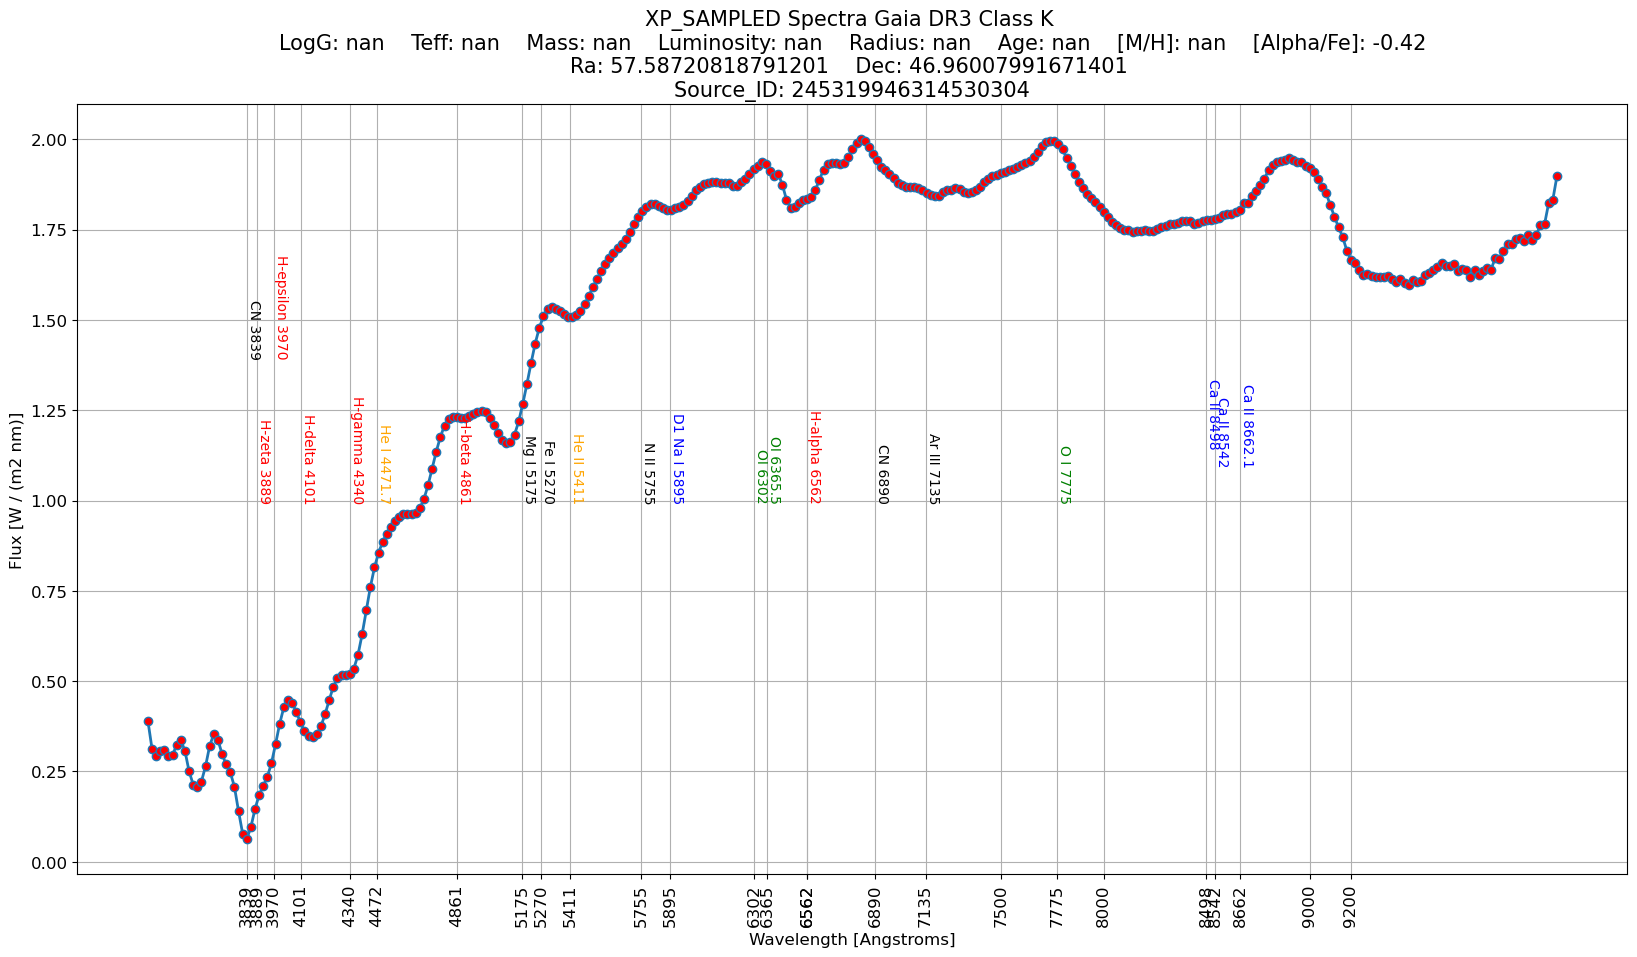


245319946314530304 has_rvs: False


Done!


In [37]:
for idx in range(0, len(results)):
    print("\n1: " + str(results[idx]) + ' has_xp_sampled: ' + str(target['has_xp_sampled'].iloc[idx]))                        # 1st print statement
    if target['has_xp_sampled'].iloc[idx] == True:
        datalink = Gaia.load_data(results[idx], data_structure = 'INDIVIDUAL', retrieval_type = 'XP_SAMPLED')
        outputs = [datalink[key][0] for key in datalink.keys()]

        #print("2: " + str(results[idx]) + " Number of stars with XP Spectra: " + str(len(outputs)))                         # 2nd print statement
        if outputs is not None:
            #print("3: " + "outputs is not None")                                                                            # 3rd print statement
            if len(outputs) > 0:
                #print("4: " + "len(outputs): " + str(len(outputs)))                                                         # 4th print statement

                # ====================================================================================
                xRa = str(target['ra'].iloc[idx])
                yDec = str(target['dec'].iloc[idx])
                source_id = str(target['source_id'].iloc[idx])

                print("\n" + "Ra: " + str(xRa))                                                                            
                print("Dec: " + str(yDec))  
                print("\n" + "Source_Id: " + str(source_id) + "\n")              

                if lamost_LRS_portal_flag == 'Y':
                    lamost_portal = 'https://dr7.lamost.org/spectrum/view?obsid=' + str(lamost_LRS_obsid)
                    webbrowser.open(lamost_portal)     

                if lamost_MRS_portal_flag == 'Y':
                    lamost_MRS_portal = 'https://dr7.lamost.org/v2.0/medspectrum/view?obsid=' + str(lamost_MRS_obsid)
                    webbrowser.open(lamost_MRS_portal)

                if cds_portal_flag == 'Y':
                    cds_portal = 'http://cdsportal.u-strasbg.fr/?target=' + str(xRa) + '%20' + str(yDec)
                    webbrowser.open(cds_portal) 

                if simbad_portal_flag == 'Y':
                    simbad_portal = 'http://simbad.cds.unistra.fr/simbad/sim-coo?Coord=' + str(xRa) + '+' + str(yDec) + \
                                '&CooFrame=FK5&CooEpoch=2000&CooEqui=2000&CooDefinedFrames=none&Radius=2&Radius.unit=arcmin&submit=submit+query'
                    webbrowser.open(simbad_portal)  

                if sdss_portal_flag == 'Y':
                    sdss_portal = 'http://skyserver.sdss.org/dr17/VisualTools/quickobj?ra=' + str(xRa) + '&dec=' + str(yDec)
                    webbrowser.open(sdss_portal)           

                if vizier_portal_flag == 'Y':
                    vizier_portal = 'http://vizier.u-strasbg.fr/viz-bin/VizieR-S?Gaia%20EDR3%20' + str(source_id) 
                    webbrowser.open(vizier_portal)                                          

                result_table = Simbad.query_region(coord.SkyCoord(str(xRa) + " " + str(yDec), 
                    unit=(u.deg, u.deg),frame='icrs'))

                #print("5: " + str(result_table))                                                                            # 5th print statement
                if result_table is not None:
                    if len(result_table) > 0:
                        #print("6: " + "Ra: " + str(xRa))                                                                     # 6th print statement
                        #print("7: " + "Dec: " + str(yDec))                                                                   # 7th print statement

                        for i in range(0, len(result_table['MAIN_ID'])):
                            if i < 5:
                                print(result_table['MAIN_ID'][i])

                        target1 = result_table['MAIN_ID'][0]

                        object = Simbad.query_object(target1)

                        tap_service = vo.dal.TAPService("http://simbad.u-strasbg.fr/simbad/sim-tap")

                        tap_sql = "SELECT main_id, sp_type, otype_txt, otype_longname \
                                        FROM basic JOIN ident ON oidref = oid \
                                            JOIN otypedef ON basic.otype = otypedef.otype \
                                        WHERE id = '" + str(target1) + "';"

                        tap_results = tap_service.search(tap_sql)
                        sptype = tap_results['sp_type']
                        txt = str(sptype).split("=")
                        txt = str(txt).replace("['", "")
                        sp_txt = str(txt).replace("']", "")
                        print("\n" + "Simbad star subclass: " + str(sp_txt))


                print("\n" + "BP_RP star subclass: " + str(target['SpT2'].iloc[idx]))
                print("BP_RP dereddened star subclass: " + str(target['SpT2_dereddened'].iloc[idx]))
                print("classlabel_espels: " + str(target['classlabel_espels'].iloc[idx]))
                print("Star Type: " + str(target['Star_Type'].iloc[idx]))
                print("\nlamost_LRS_designation: "  + str(lamost_LRS_designation))
                print("lamost_LRS_obsid: "  + str(lamost_LRS_obsid))
                print("lamost_LRS_subclass: " + str(lamost_LRS_subclass) + '\n' )
                print("lamost_MRS_designation: "  + str(lamost_MRS_designation))
                print("lamost_MRS_obsid: "  + str(lamost_MRS_obsid))
                print("lamost_MRS_mobsid: " + str(lamost_MRS_mobsid) + '\n' )
                #print("SpTypeSim: " +  str(SpTypeSim))
                #print("SpTypeSD: " +  str(SpTypeSD))
                #print("SpName: " +  str(SpName))
                #print('\nasassn_name: ' + str(df_variable[['asassn_name']].values))
                #print('other_names: ' + str(df_variable[['other_names']].values))
                #print("ASAS_SN Variable Type: " + str(df_variable[['variable_type']].values))
                #print("\nlamost_designation: "  + str(lamost_designation))
                #print("lamost_obsid: "  + str(lamost_obsid))
                #print("lamost_subclass: " + str(lamost_subclass))
                #print("Star Distance [pc]: " + str(int(target['distance_gspphot'].iloc[idx])))
                #print("Star Distance [light years]: " + str(int(target['distance_gspphot'].iloc[idx] * 3.26156)) + "\n")

                # ====================================================================================


                xp      = outputs[0].to_table()                       

                # Add flux-density columns ============================
                xp['flux_jy']         = xp['flux'].to(u.Jansky, equivalencies = u.spectral_density(xp['wavelength'].value * xp['wavelength'].unit))
                xp['flux_mjy']        = xp['flux_jy'].to(u.millijansky)
                xp['flux_mjy'].format = '7.4f'
                
                # =========
                
                #display(xp)

                # =========

                fig       = plt.figure(figsize=[20,10])

                yRangeMax = float(xp['flux'].max())

                plt.plot(xp['wavelength']*10, xp['flux']/yRangeMax * 2, linewidth = 2, marker='o', markerfacecolor='red') 
                plt.title('XP_SAMPLED Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                ' \nLogG: ' + str(round(target['logg_gspphot'].iloc[idx], 2)) + 
                '    Teff: ' + str(round(target['teff_gspphot'].iloc[idx],0)) +
                '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                '    [M/H]: ' + str(round(target['mh_gspphot'].iloc[idx],2)) +
                '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                if make_canvas_flag == "Y":
                    make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", 
                                fontsize = 12)
                #else:
                    #make_labels()

                if hydrogen_lines_flag == "Y":
                    Hydrogen_lines(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", 
                                   fontsize = 12)

                plt.show()


                
                    
        print("\n" + str(results[idx]) + ' has_rvs: ' + str(target['has_rvs'].iloc[idx]) + "\n")
        if target['has_rvs'].iloc[idx] == True:
            datalinkRVS = Gaia.load_data(results[idx], data_structure = 'INDIVIDUAL', retrieval_type = 'RVS')
            outputsRVS = [datalinkRVS[key][0] for key in datalinkRVS.keys()]
            #print("datalinkRVS: " + str(datalinkRVS))

            if outputsRVS is not None:
                if len(outputsRVS) >0:
                    xpRVS      = outputsRVS[0].to_table()

                    # =========
                
                    #display(xpRVS)

                    # =========

                    fig       = plt.figure(figsize=[20,10])

                    yRangeMax = float(xpRVS['flux'].max())

                    plt.plot(xpRVS['wavelength']*10, xpRVS['flux']/yRangeMax * 2, linewidth = 2, marker='.', markerfacecolor='red') 
                    plt.title('RVS Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                    ' \nLogG: ' + str(round(target['logg_gspspec'].iloc[idx], 2)) + 
                    '    Teff: ' + str(round(target['teff_gspspec'].iloc[idx],0)) +
                    '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                    '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                    '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                    '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                    '    [M/H]: ' + str(round(target['mh_gspspec'].iloc[idx],2)) +
                    '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                    '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                    ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                    if make_canvas_flag == "Y":
                        #make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", fontsize = 12)
                        #make_labels()
                        make_RVS_canvas()
                        
                    plt.show()


                    fig       = plt.figure(figsize=[20,10])

                    yRangeMax = float(xpRVS['flux'].max())

                    plt.plot(xpRVS['wavelength']*10, xpRVS['flux']/yRangeMax * 2, linewidth = 2, marker='.', markerfacecolor='red') 
                    plt.title('RVS Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                    ' \nLogG: ' + str(round(target['logg_gspspec'].iloc[idx], 2)) + 
                    '    Teff: ' + str(round(target['teff_gspspec'].iloc[idx],0)) +
                    '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                    '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                    '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                    '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                    '    [M/H]: ' + str(round(target['mh_gspspec'].iloc[idx],2)) +
                    '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                    '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                    ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                    plt.xlim(8460, 8580)

                    if make_canvas_flag == "Y":
                        #make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", fontsize = 12)
                        #make_labels()
                        make_RVS_canvas1()
                        
                    plt.show()


                    fig       = plt.figure(figsize=[20,10])

                    yRangeMax = float(xpRVS['flux'].max())

                    plt.plot(xpRVS['wavelength']*10, xpRVS['flux']/yRangeMax * 2, linewidth = 2, marker='.', markerfacecolor='red') 
                    plt.title('RVS Spectra Gaia DR3 Class '+ str(target['spectraltype_esphs'].iloc[idx]) + 
                    ' \nLogG: ' + str(round(target['logg_gspspec'].iloc[idx], 2)) + 
                    '    Teff: ' + str(round(target['teff_gspspec'].iloc[idx],0)) +
                    '    Mass: ' + str(round(target['mass_flame'].iloc[idx],2)) +
                    '    Luminosity: ' + str(round(target['lum_flame'].iloc[idx],2)) +
                    '    Radius: ' + str(round(target['radius_gspphot'].iloc[idx],2)) +
                    '    Age: ' + str(round(target['age_flame'].iloc[idx],2)) +
                    '    [M/H]: ' + str(round(target['mh_gspspec'].iloc[idx],2)) +
                    '    [Alpha/Fe]: ' + str(round(target['alphafe_gspspec'].iloc[idx],2)) +
                    '\nRa: ' + str(target['ra'].iloc[idx]) + "    Dec: " + str(target['dec'].iloc[idx]) +
                    ' \nSource_ID: ' + str(target['source_id'].iloc[idx]), fontsize=15)

                    plt.xlim(8580, 8700)

                    if make_canvas_flag == "Y":
                        #make_canvas(xlabel = f"Wavelength [{xp['wavelength'].unit}]", ylabel = f"Flux [{xp['flux'].unit}]", fontsize = 12)
                        #make_labels()
                        make_RVS_canvas2()
                        
                    plt.show()


        #print(str(results[idx]) + ' has_xp_continuous: ' + str(target['has_xp_continuouss'].iloc[idx]))
        if target['has_xp_continuous'].iloc[idx] == True:
            datalinkXPC = Gaia.load_data(results[idx], data_structure = 'INDIVIDUAL', retrieval_type = 'XP_CONTINUOUS')
            outputsXPC = [datalinkXPC[key][0] for key in datalinkXPC.keys()]
            #print("datalinkXPC: " + str(datalinkXPC))

           

print("\nDone!")